In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt

Example with a different dataset

In [2]:
df=pd.read_csv("classification-data.csv",index_col=0)

In [3]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


Because the KNN classifier predicts the class of a given test observation by identifying the observations that are nearest to it, the scale of the variables matters. Any variables that are on a large scale will have a much larger effect on the distance between the observations, and hence on the KNN classifier, than variables that are on a small scale.

In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
scaler = StandardScaler()

In [6]:
scaler.fit(df.drop('TARGET CLASS',axis=1))

StandardScaler()

In [7]:
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1))

In [8]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['TARGET CLASS'],
                                                    test_size=0.30)

In [11]:
from sklearn.neighbors import KNeighborsClassifier

In [12]:
knn = KNeighborsClassifier(n_neighbors=1)

In [13]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [14]:
pred = knn.predict(X_test)

In [15]:
from sklearn.metrics import classification_report,confusion_matrix

In [16]:
print(confusion_matrix(y_test,pred))

[[128  17]
 [  8 147]]


In [17]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.94      0.88      0.91       145
           1       0.90      0.95      0.92       155

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



Performing k fold cross validation

In [20]:
from sklearn.model_selection import KFold
kf = KFold( n_splits=5, shuffle=False)


# print the contents of each training and testing set
# ^ - forces the field to be centered within the available space
# .format() - formats the string similar to %s or %n
# enumerate(sequence, start=0) - returns an enumerate object
print('{} {:^61} {}'.format('Iteration', 'Training set obsevations', 'Testing set observations'))
for train, test in kf.split(scaled_features):
  print("%s %s" % (train, test))

Iteration                   Training set obsevations                    Testing set observations
[200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217
 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235
 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253
 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271
 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287 288 289
 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305 306 307
 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323 324 325
 326 327 328 329 330 331 332 333 334 335 336 337 338 339 340 341 342 343
 344 345 346 347 348 349 350 351 352 353 354 355 356 357 358 359 360 361
 362 363 364 365 366 367 368 369 370 371 372 373 374 375 376 377 378 379
 380 381 382 383 384 385 386 387 388 389 390 391 392 393 394 395 396 397
 398 399 400 401 402 403 404 405 406 407 408 409 410 411 412 413 414 415
 416 417 418 419 420 421 42

In [21]:
from sklearn.model_selection import cross_val_score


In [22]:
knn = KNeighborsClassifier(n_neighbors=5)


scores = cross_val_score(knn, scaled_features, df['TARGET CLASS'], cv=10, scoring='accuracy')
print(scores)

[0.93 0.95 0.91 0.94 0.87 0.92 0.94 0.92 0.97 0.94]


In [23]:
print(scores.mean())


0.9289999999999999


In [24]:
# search for an optimal value of K for KNN

# range of k we want to try
k_range = range(1, 31)
# empty list to store scores
k_scores = []

# 1. we will loop through reasonable values of k
for k in k_range:
    # 2. run KNeighborsClassifier with k neighbours
    knn = KNeighborsClassifier(n_neighbors=k)
    # 3. obtain cross_val_score for KNeighborsClassifier with k neighbours
    scores = cross_val_score(knn, scaled_features, df['TARGET CLASS'], cv=10, scoring='accuracy')
    # 4. append mean of scores for k neighbors to k_scores list
    k_scores.append(scores.mean())


print(k_scores)

[0.9109999999999999, 0.909, 0.9280000000000002, 0.9339999999999999, 0.9289999999999999, 0.929, 0.9310000000000003, 0.9340000000000002, 0.9289999999999999, 0.9350000000000002, 0.9329999999999998, 0.9350000000000002, 0.937, 0.9410000000000001, 0.9390000000000001, 0.9390000000000001, 0.9349999999999999, 0.9360000000000002, 0.9360000000000002, 0.9360000000000002, 0.9339999999999999, 0.9359999999999999, 0.93, 0.933, 0.9349999999999999, 0.937, 0.9380000000000001, 0.938, 0.937, 0.9390000000000001]


In [25]:
print('Length of list', len(k_scores))
print('Max of list', max(k_scores))

Length of list 30
Max of list 0.9410000000000001


Text(0, 0.5, 'Cross-validated accuracy')

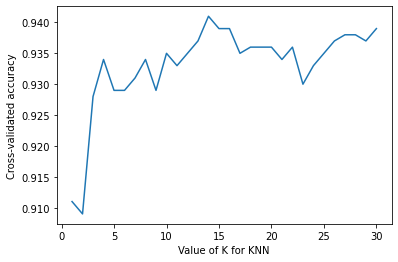

In [26]:
# plot how accuracy changes as we vary k
import matplotlib.pyplot as plt
%matplotlib inline

# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
# plt.plot(x_axis, y_axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-validated accuracy')

In [28]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.9166666666666666

In [30]:
from sklearn.metrics import classification_report,f1_score
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.94      0.88      0.91       145
           1       0.90      0.95      0.92       155

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



In [32]:
print(f1_score(y_test, pred, average='macro'))
print(f1_score(y_test, pred, average='micro'))
print(f1_score(y_test, pred, average='weighted'))
print(f1_score(y_test, pred, average=None))

0.916331061256819
0.9166666666666666
0.9165076956830547
[0.91103203 0.92163009]


In [35]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred)

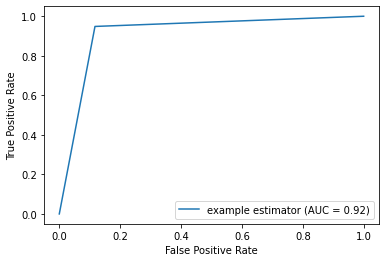

In [36]:
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                   estimator_name='example estimator')
display.plot()
plt.show()